<a href="https://colab.research.google.com/github/Eshanthreddy130705/Bankruptcy-Prediction-Using-XGBoost/blob/main/Bankruptcy_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BANKRUPTCY PREDICTION**

In this notebook, we work with financial data to predict company bankruptcy. The dataset includes 95 features and 6,819 companies.

We start with exploratory data analysis (EDA), including visualizations like correlation heatmaps, to understand the data better. Then, we build some basic models using Logistic Regression, XGBoost, and Random Forest.

To improve model performance, we tune the hyperparameters using grid search or random search. After tuning, we compare the models and evaluate their performance with the business goal in mind.

A common mistake in this kind of problem is using SMOTE (Synthetic Minority Oversampling Technique) on the test set, which leads to unrealistically high F1 scores. Since the dataset has a class imbalance, the real challenge is building a model that handles this imbalance well during testing.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc,f1_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [33]:
df=pd.read_csv('/content/dataset.csv')
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [5]:
#eda
#initial inspection
print(df.shape)
df.describe()

(6819, 96)


Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [6]:

#print(df.info)
#hadling missing values
'''no missing values since count number is erqual to the number of rows '''
df_handles=df.fillna(df.mean(numeric_only='True'))
print(df.equals(df_handles))

True


**Correlation Analysis**

We compute the correlation matrix to understand the relationships between features. This helps us identify highly correlated features that might be redundant or multicollinear. The correlation matrix is printed, and we observe that some features have strong correlations with each other.

In [7]:
#data profiling
print(df.corr(numeric_only='True'))

                                                    Bankrupt?  \
Bankrupt?                                            1.000000   
 ROA(C) before interest and depreciation before...  -0.260807   
 ROA(A) before interest and % after tax             -0.282941   
 ROA(B) before interest and depreciation after tax  -0.273051   
 Operating Gross Margin                             -0.100043   
...                                                       ...   
 Liability to Equity                                 0.166812   
 Degree of Financial Leverage (DFL)                  0.010508   
 Interest Coverage Ratio (Interest expense to E...  -0.005509   
 Net Income Flag                                          NaN   
 Equity to Liability                                -0.083048   

                                                     ROA(C) before interest and depreciation before interest  \
Bankrupt?                                                                                   -0.260807      

### Visualizing Correlation with Heatmap

To better visualize the correlation matrix, we create a heatmap using Seaborn. The heatmap helps us quickly identify which features are strongly correlated with the target variable (`Bankrupt?`) and with each other. This step is crucial for feature selection and understanding the data structure.

In [8]:
#we see that for net income flag correlation is nan need for heat maps to drop any features
corr_matrix=df.corr(numeric_only='True')
plt.figure(figsize=(120,100))#increase size for transparency
sns.heatmap(corr_matrix,fmt=".2f",annot=True,cmap='coolwarm',linewidths=0.5)
plt.show()

#**Identifying Highly Correlated Features (No Columns Dropped Yet)**
This code identifies pairs of features with very high correlation (above 0.96), which can lead to multicollinearity and affect model performance. For each highly correlated pair, the second feature is marked for potential removal. However, no columns are actually dropped here—the drop line is commented out. The purpose is to understand which features are redundant before making any changes to the dataset.

In [9]:
#to identify highly correlated pairs with >0.96
'''corr_matrix = df.corr(numeric_only=True)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.96:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
for pair in high_corr_pairs:
    print(f"Features {pair[0]} and {pair[1]} have a correlation of {pair[2]}")'''
corr_matrix = df.corr(numeric_only=True)

high_corr_pairs = []
columns_to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.96:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            high_corr_pairs.append((col1, col2, corr_value))

            # Drop one of the columns — pick second one by default
            if col2 not in columns_to_drop and col2 not in columns_to_drop:
                columns_to_drop.add(col2)

# Drop the selected columns
#df = df.drop(columns=columns_to_drop)

# Optional: print dropped columns and correlations
for pair in high_corr_pairs:
    print(f"Features {pair[0]} and {pair[1]} have a correlation of {pair[2]}")
print(f"\nDropped columns: {columns_to_drop}")
print(len(columns_to_drop))

Features  ROA(C) before interest and depreciation before interest and  ROA(B) before interest and depreciation after tax have a correlation of 0.9868494970182541
Features  ROA(A) before interest and % after tax and  Net Income to Total Assets have a correlation of 0.9615519166312979
Features  Operating Gross Margin and  Realized Sales Gross Margin have a correlation of 0.9995182781255221
Features  Operating Gross Margin and  Gross Profit to Sales have a correlation of 0.9999999924887606
Features  Realized Sales Gross Margin and  Gross Profit to Sales have a correlation of 0.9995182260040115
Features  Pre-tax net Interest Rate and  After-tax net Interest Rate have a correlation of 0.9863790242582028
Features  Pre-tax net Interest Rate and  Continuous interest rate (after tax) have a correlation of 0.9936165193085659
Features  After-tax net Interest Rate and  Continuous interest rate (after tax) have a correlation of 0.984452328775917
Features  Net Value Per Share (B) and  Net Value Per 

In [10]:
#we can observe that 15 columns will be  dropped if we uncomment the drop function in the above cell
#15 columns can be dropped based on correlation
df.shape

(6819, 96)

We visualize the distribution of the target variable 'Bankrupt?' using a count plot. This helps us observe class imbalance in the dataset. The calculation shows that only a small percentage of companies are labeled as bankrupt, indicating a significant class imbalance. This is important to consider when selecting evaluation metrics and modeling strategies.

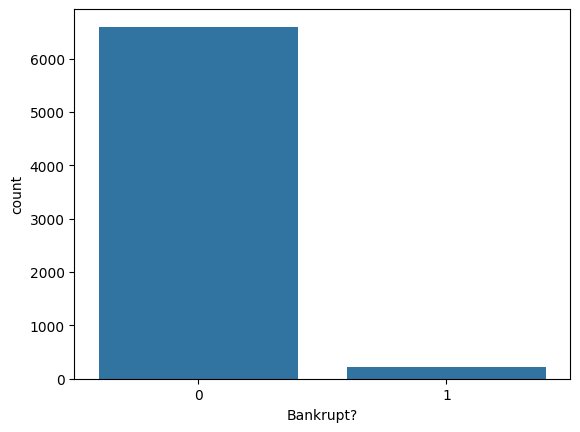

class imbalance is significant with 3.2%


In [11]:
plt.show(sns.countplot(x='Bankrupt?',data=df))
class_imbalance=round(sum(df['Bankrupt?'])/len(df['Bankrupt?']),3)*100
print(f'class imbalance is significant with {class_imbalance}%')

The dataset is clean and ready to use — all features are numeric, normalized, and contain no missing values, so minimal preprocessing is required.

The main issue is a significant class imbalance, as only a small percentage of companies in the data are labeled as bankrupt. To address this, we’ll apply SMOTE (Synthetic Minority Oversampling Technique) to balance the classes by generating synthetic samples of the minority class. It's crucial that SMOTE is applied only to the training set to prevent data leakage and ensure that test results reflect real-world performance.

Although we could look into handling outliers, since the data is already normalized and seems consistent, we’ve chosen to skip outlier treatment in this implementation.

In [12]:
#assigning training and testing set
df2=df
X=df2.drop('Bankrupt?',axis=1)
y=df2['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

class imbalance is addressed with smotenc:


<Axes: ylabel='count'>

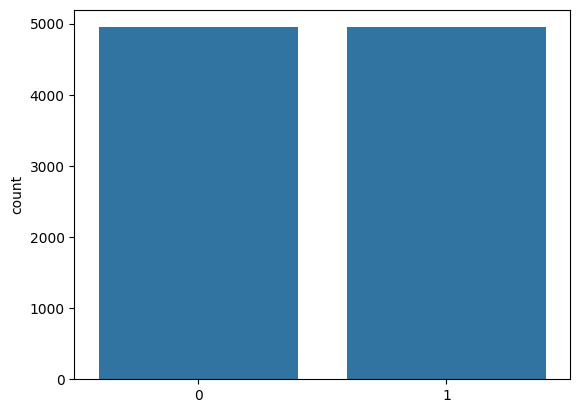

In [14]:
sm=SMOTENC(categorical_features=[84],random_state=42)
X_train_SMOTE,y_train_SMOTE=sm.fit_resample(X_train,y_train.ravel())
print('class imbalance is addressed with smotenc:')
sns.countplot(x=y_train_SMOTE)

In [15]:
log_reg=LogisticRegression()
log_reg.fit(X_train_SMOTE,y_train_SMOTE)

print('Training Accuracy: {:.4}%'.format(log_reg.score(X_train_SMOTE, y_train_SMOTE) * 100))
print('Validation accuracy: {:.4}%'.format(log_reg.score(X_test, y_test) * 100))

Training Accuracy: 61.91%
Validation accuracy: 76.72%


In [16]:
# Instantiate and Fit an XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train_SMOTE, y_train_SMOTE)

# Accuracy of training and test sets
print('Training Accuracy: {:.4}%'.format(XGB.score(X_train_SMOTE, y_train_SMOTE) * 100))
print('Validation accuracy: {:.4}%'.format(XGB.score(X_test, y_test) * 100))

Training Accuracy: 100.0%
Validation accuracy: 96.95%


In [17]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train_SMOTE, y_train_SMOTE)

# Training and Testing accuracy score
print('Training Accuracy: {:.4}%'.format(forest.score(X_train_SMOTE, y_train_SMOTE) * 100))
print('Validation accuracy: {:.4}%'.format(forest.score(X_test, y_test) * 100))

Training Accuracy: 100.0%
Validation accuracy: 95.66%


In [18]:
# Comparing all three models
print('LogReg Validation set Accuracy:  {:.4}%'.format(log_reg.score(X_test, y_test) * 100))
print('XGBoost Validation set Accuracy: {:.4}%'.format(XGB.score(X_test, y_test) * 100))
print('Forest Validation set Accuracy:  {:.4}%'.format(forest.score(X_test, y_test) * 100))

log_pred=log_reg.predict(X_test)
XGB_pred=XGB.predict(X_test)
RF_pred=forest.predict(X_test)

print('\nLogistic Regression Report:')
print(classification_report(y_test, log_pred))
print('\nXGBoost Report:')
print(classification_report(y_test, XGB_pred))
print('\nRF Report:')
print(classification_report(y_test, RF_pred))

LogReg Validation set Accuracy:  76.72%
XGBoost Validation set Accuracy: 96.95%
Forest Validation set Accuracy:  95.66%

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1650
           1       0.05      0.33      0.08        55

    accuracy                           0.77      1705
   macro avg       0.51      0.55      0.47      1705
weighted avg       0.94      0.77      0.84      1705


XGBoost Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1650
           1       0.53      0.49      0.51        55

    accuracy                           0.97      1705
   macro avg       0.76      0.74      0.75      1705
weighted avg       0.97      0.97      0.97      1705


RF Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1650
           1       0.38      0.55      0.45        55

    

In [19]:
print('Baseline Models with Default Parameters:\n')
print('Logistic Regression F1:')
print(f1_score(y_test, log_pred))
print('\nXGB F1:')
print(f1_score(y_test, XGB_pred))
print('\nRF F1:')
print(f1_score(y_test, RF_pred))

Baseline Models with Default Parameters:

Logistic Regression F1:
0.08314087759815242

XGB F1:
0.5094339622641509

RF F1:
0.44776119402985076


In [22]:
coef = log_reg.coef_[0]
logreg_coef = pd.DataFrame(coef,
             X_train_SMOTE.columns,
             columns=['coef']).sort_values(by='coef', ascending=False)
logreg_coef

coef
Fixed Assets to Assets               4.677088e-09
Total debt/Total net worth           6.399189e-10
Cash/Current Liability               4.370042e-10
Total assets to GNP price            3.317002e-10
Quick Ratio                          2.669480e-10
...                                           ...
Quick Assets/Current Liability      -9.783190e-10
Allocation rate per person          -1.640976e-09
Average Collection Days             -3.285815e-09
Accounts Receivable Turnover        -4.407537e-09
Interest-bearing debt interest rate -5.858775e-09

[95 rows x 1 columns]

from matplotlib import pyplot as plt
logreg_coef['coef'].plot(kind='hist', bins=20, title='coef')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
logreg_coef['coef'].plot(kind='line', figsize=(8, 4), title='coef')
plt.gca().spines[['top', 'right']].set_visible(False)

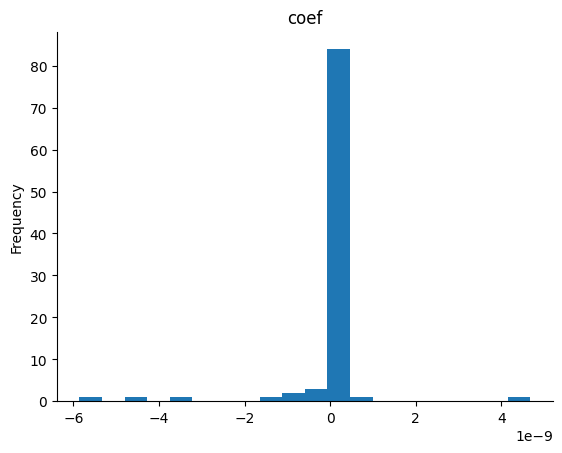

In [28]:
from matplotlib import pyplot as plt
logreg_coef['coef'].plot(kind='hist', bins=20, title='coef')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [25]:
measure=['accuracy','f1']
optimize='f1'

## Hyperparameter Tuning

To improve model performance, we perform hyperparameter tuning using techniques like `GridSearchCV` or `RandomizedSearchCV`. This involves:
1. Defining a parameter grid for each model.
2. Searching for the best combination of hyperparameters using cross-validation.
3. Retraining the model with the best hyperparameters and evaluating its performance.

### Tuning XGBoost
We focus on tuning XGBoost due to its high performance. Key hyperparameters include:
- `learning_rate`: Step size shrinkage to prevent overfitting.
- `max_depth`: Maximum depth of the trees.
- `n_estimators`: Number of boosting rounds.
- `subsample`: Fraction of samples used for training.

After tuning, we compare the performance of the tuned model with the baseline model

In [ ]:
logreg_params = {
    "C" : [1], # 0.01, 0.1
    'class_weight': ['balanced'],
    "penalty" : ["l1"], # 'l2'
    'solver':['liblinear']
}

# Searching Parameters
tuned_logreg = GridSearchCV(log_reg, logreg_params, scoring=optimize, cv=3, n_jobs=1)
tuned_logreg.fit(X_train_SMOTE, y_train_SMOTE)

logreg_best_params = tuned_logreg.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(logreg_best_params.keys()):
    print('%s: %r' % (param_name, logreg_best_params[param_name]))

Grid Search found the following optimal parameters: 
C: 1
class_weight: 'balanced'
penalty: 'l1'
solver: 'liblinear'


In [ ]:
# Grid Search Results
grid_results = pd.concat([pd.DataFrame(tuned_logreg.cv_results_["params"]),pd.DataFrame(tuned_logreg.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
display(grid_results.head())

# Comparison to Baseline
Tlogreg_pred=tuned_logreg.predict(X_test)
print('Baseline Logistic Regression F1: ' + str(f1_score(y_test, log_pred)))
print('Tuned Logistic Regression F1: ' + str(f1_score(y_test, Tlogreg_pred)))

C class_weight penalty     solver  Accuracy
0  1     balanced      l1  liblinear  0.903865

Baseline Logistic Regression F1: 0.08314087759815242
Tuned Logistic Regression F1: 0.3202846975088968


In [27]:
# Our hyperparameter grid, with some other options as comments

XGB_params = {
    'min_child_weight' : [0],
    'alpha' : [0.01], # L1 regularization
    'eval_metric':['mlogloss'],
    'lambda':[1], # L2 regularization
    'max_depth': [4, 6, None],
    'n_estimators': [120, 180],
}

# Searching Parameters
tuned_XGB = GridSearchCV(XGB, XGB_params, scoring=optimize, cv=3, n_jobs=1)
tuned_XGB.fit(X_train_SMOTE, y_train_SMOTE)

XGB_best_parameters = tuned_XGB.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(XGB_best_parameters.keys()):
    print('%s: %r' % (param_name, XGB_best_parameters[param_name]))

Grid Search found the following optimal parameters: 
alpha: 0.01
eval_metric: 'mlogloss'
lambda: 1
max_depth: 4
min_child_weight: 0
n_estimators: 180


In [ ]:
# Grid Search Results
grid_results = pd.concat([pd.DataFrame(tuned_XGB.cv_results_["params"]),pd.DataFrame(tuned_XGB.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
display(grid_results.head())

# Comparison to Baseline
TXGB_pred=tuned_XGB.predict(X_test)
print('Baseline XGBoost F1: ' + str(f1_score(y_test, XGB_pred)))
print('Tuned XGB F1: ' + str(f1_score(y_test, TXGB_pred)))

alpha eval_metric  lambda  max_depth  min_child_weight  n_estimators  \
0   0.01    mlogloss       1        4.0                 0           120   
1   0.01    mlogloss       1        4.0                 0           180   
2   0.01    mlogloss       1        6.0                 0           120   
3   0.01    mlogloss       1        6.0                 0           180   
4   0.01    mlogloss       1        NaN                 0           120   

   Accuracy  
0  0.985334  
1  0.986422  
2  0.985441  
3  0.986229  
4  0.985441

Baseline XGBoost F1: 0.5094339622641509
Tuned XGB F1: 0.48936170212765956


In [ ]:
# Our hyperparameter grid, with some other options as comments

rf_params = {
    'bootstrap' : [False],
    'class_weight' : ['balanced'], # 'balanced_subsample',
    'criterion' : ['entropy'], # 'gini',
    'max_features' : ['sqrt'],
    'max_depth' : [3, 5, 10, None],
    'n_estimators' : [100, 120, 140, 200, 300,]
}

# Searching parameters
tuned_rf = GridSearchCV(forest, rf_params, scoring=optimize, cv=3, n_jobs=1)
tuned_rf.fit(X_train_SMOTE, y_train_SMOTE)

rf_best_params = tuned_rf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(rf_best_params.keys()):
    print('%s: %r' % (param_name, rf_best_params[param_name]))

Grid Search found the following optimal parameters: 
bootstrap: False
class_weight: 'balanced'
criterion: 'entropy'
max_depth: None
max_features: 'sqrt'
n_estimators: 140


In [ ]:
# Grid Search Results
grid_results = pd.concat([pd.DataFrame(tuned_rf.cv_results_["params"]),pd.DataFrame(tuned_rf.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
display(grid_results.head())

# Comparison to Baseline
TRF_pred=tuned_rf.predict(X_test)
print('Baseline Random Forest F1: ' + str(f1_score(y_test, RF_pred)))
print('Tuned Random Forest F1: ' + str(f1_score(y_test, TRF_pred)))

bootstrap class_weight criterion  max_depth max_features  n_estimators  \
0      False     balanced   entropy        3.0         sqrt           100   
1      False     balanced   entropy        3.0         sqrt           120   
2      False     balanced   entropy        3.0         sqrt           140   
3      False     balanced   entropy        3.0         sqrt           200   
4      False     balanced   entropy        3.0         sqrt           300   

   Accuracy  
0  0.910202  
1  0.908116  
2  0.910543  
3  0.909680  
4  0.910188

Baseline Random Forest F1: 0.40310077519379844
Tuned Random Forest F1: 0.45


In [ ]:
# Model overviews - classification reports
print('\nTuned Logistic Regression Report:')
print(classification_report(y_test, Tlogreg_pred))
print('\nTuned XGBoost Report:')
print(classification_report(y_test, TXGB_pred))
print('\nTuned RF Report:')
print(classification_report(y_test, TRF_pred))


Tuned Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1650
           1       0.20      0.82      0.32        55

    accuracy                           0.89      1705
   macro avg       0.60      0.85      0.63      1705
weighted avg       0.97      0.89      0.92      1705


Tuned XGBoost Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1650
           1       0.59      0.42      0.49        55

    accuracy                           0.97      1705
   macro avg       0.79      0.70      0.74      1705
weighted avg       0.97      0.97      0.97      1705


Tuned RF Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1650
           1       0.42      0.49      0.45        55

    accuracy                           0.96      1705
   macro avg       0.70      0.73      0.71      170

In [ ]:
# Interpreting results of our hyperparameter tuning
print('Tuned F1 Compared to Baseline:\n')
print('Baseline Logistic Regression F1: ' + str(f1_score(y_test, log_pred)))
print('Tuned Logistic Regression F1: ' + str(f1_score(y_test, Tlogreg_pred)))
print()
print('Baseline XGBoost F1: ' + str(f1_score(y_test, XGB_pred)))
print('Tuned XGB F1: ' + str(f1_score(y_test, TXGB_pred)))
print()
print('Baseline Random Forest F1: ' + str(f1_score(y_test, RF_pred)))
print('Tuned Random Forest F1: ' + str(f1_score(y_test, TRF_pred)))

Tuned F1 Compared to Baseline:

Baseline Logistic Regression F1: 0.08314087759815242
Tuned Logistic Regression F1: 0.3202846975088968

Baseline XGBoost F1: 0.5094339622641509
Tuned XGB F1: 0.48936170212765956

Baseline Random Forest F1: 0.40310077519379844
Tuned Random Forest F1: 0.45


In [ ]:
# Accuracy Scores
print('Tuned Accuracy Scores compared to Baseline:\n')
print('LogReg Validation Accuracy:         {:.4}%'.format(log_reg.score(X_test, y_test) * 100))
print('Tuned LogReg Validation Accuracy:   {:.4}%'.format(tuned_logreg.best_score_*100))
print()
print('XGBoost Validation Accuracy:        {:.4}%'.format(XGB.score(X_test, y_test) * 100))
print('Tuned XGBoost Validation Accuracy:  {:.4}%'.format(tuned_XGB.best_score_*100))
print()
print('Forest Validation Accuracy:         {:.4}%'.format(forest.score(X_test, y_test) * 100))
print('Tuned Forest Validation Accuracy:   {:.4}%'.format(tuned_rf.best_score_*100))

Tuned Accuracy Scores compared to Baseline:

LogReg Validation Accuracy:         76.72%
Tuned LogReg Validation Accuracy:   90.39%

XGBoost Validation Accuracy:        96.95%
Tuned XGBoost Validation Accuracy:  98.64%

Forest Validation Accuracy:         95.48%
Tuned Forest Validation Accuracy:   98.23%


#**CONCLUSION**
After tuning, all models showed significant accuracy improvements. Logistic Regression rose from 76.72% to 90.39%, XGBoost from 96.95% to 98.64%, and Random Forest from 95.48% to 98.23%. This highlights the importance of hyperparameter tuning. XGBoost emerged as the best-performing model, while Logistic Regression remains valuable for its simplicity and interpretability, making it suitable for ensemble use.
